In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
X_train,X_test=X_train/255.0,X_test/255.0

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *

In [6]:
Y_train,Y_test=Y_train.flatten(),Y_test.flatten()

In [7]:
K=len(set(Y_train))
K

10

In [8]:
X_train[0].shape

(32, 32, 3)

In [13]:
i=Input(shape=X_train[0].shape)

x=Conv2D(32,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2))(x)

x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2))(x)

x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2))(x)

x=Flatten()(x)

x=Dropout(0.2)(x)

x=Dense(units=1024,activation='relu')(x)
x=Dropout(rate=0.2)(x)
x=Dense(units=K,activation='softmax')(x)

model=Model(inputs=i,outputs=x)

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0   

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=50)

Epoch 1/50
1563/1563 [==============================] - 19s 8ms/step - loss: 1.2925 - accuracy: 0.5550 - val_loss: 1.1839 - val_accuracy: 0.6058
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8490 - accuracy: 0.7052 - val_loss: 0.8712 - val_accuracy: 0.6932
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6924 - accuracy: 0.7639 - val_loss: 0.9942 - val_accuracy: 0.6935
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5801 - accuracy: 0.8015 - val_loss: 0.6811 - val_accuracy: 0.7703
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5044 - accuracy: 0.8267 - val_loss: 0.6938 - val_accuracy: 0.7770
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4280 - accuracy: 0.8520 - val_loss: 0.6635 - val_accuracy: 0.7995
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3603 - accuracy: 0.8757 - val_loss: 0.6715 - val_ac

In [18]:
losses=pd.DataFrame(model.history.history)

In [19]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.292460,0.55500,1.183852,0.6058
1,0.849033,0.70520,0.871250,0.6932
2,0.692375,0.76388,0.994239,0.6935
3,0.580078,0.80148,0.681089,0.7703
4,0.504447,0.82672,0.693821,0.7770
5,0.427955,0.85196,0.663540,0.7995
6,0.360295,0.87568,0.671477,0.7943
7,0.300474,0.89688,0.710288,0.7895
8,0.262701,0.91016,0.620929,0.8168
9,0.230362,0.92176,0.614216,0.8220


<AxesSubplot:>

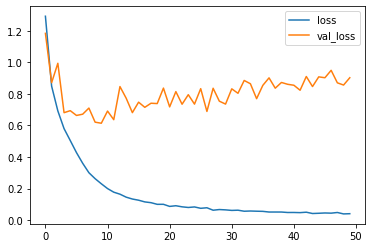

In [20]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

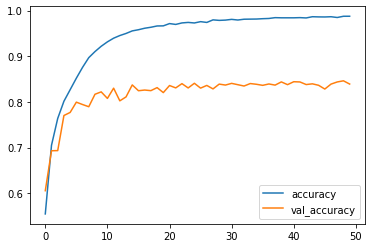

In [22]:
losses[['accuracy','val_accuracy']].plot()

In [35]:
# Labels/Classes
'''
0. airplane 
1. automobile 
2. bird 
3. cat 
4. deer 
5. dog 
6. frog 
7. horse 
8. ship 
9. truck
'''

'\n0. airplane \n1. automobile \n2. bird \n3. cat \n4. deer \n5. dog \n6. frog \n7. horse \n8. ship \n9. truck\n'

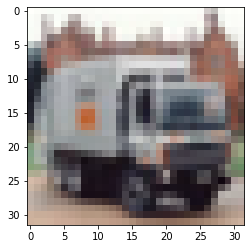

In [28]:
plt.imshow(X_test[11])

In [29]:
model.predict(X_test[11].reshape(1,32,32,3)).argmax(axis=1)

1/1 [==============================] - 0s 37ms/step


array([9])

# **Using Data Augmentation**

In [30]:
i1=Input(shape=X_train[0].shape)

x1=Conv2D(32,(3,3),activation='relu',padding='same')(i1)
x1=BatchNormalization()(x1)
x1=Conv2D(32,(3,3),activation='relu',padding='same')(x1)
x1=BatchNormalization()(x1)
x1=MaxPooling2D(pool_size=(2,2))(x1)

x1=Conv2D(64,(3,3),activation='relu',padding='same')(x1)
x1=BatchNormalization()(x1)
x1=Conv2D(64,(3,3),activation='relu',padding='same')(x1)
x1=BatchNormalization()(x1)
x1=MaxPooling2D(pool_size=(2,2))(x1)

x1=Conv2D(128,(3,3),activation='relu',padding='same')(x1)
x1=BatchNormalization()(x1)
x1=Conv2D(128,(3,3),activation='relu',padding='same')(x1)
x1=BatchNormalization()(x1)
x1=MaxPooling2D(pool_size=(2,2))(x1)

x1=Flatten()(x1)

x1=Dropout(0.2)(x1)

x1=Dense(units=1024,activation='relu')(x1)
x1=Dropout(rate=0.2)(x1)
x1=Dense(units=K,activation='softmax')(x1)

model2=Model(inputs=i1,outputs=x1)

In [31]:
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0   

In [32]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
from keras.preprocessing.image import ImageDataGenerator

In [36]:
batch_size=32

data_generator=ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator=data_generator.flow(X_train,Y_train,batch_size=batch_size)

steps_per_epoch=X_train.shape[0]//batch_size

In [37]:
model2.fit_generator(train_generator,validation_data=(X_test,Y_test),steps_per_epoch=steps_per_epoch,epochs=50)

Epoch 1/50


<ipython-input-37-5f73d055a3ef>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2.fit_generator(train_generator,validation_data=(X_test,Y_test),steps_per_epoch=steps_per_epoch,epochs=50)


1562/1562 [==============================] - 39s 22ms/step - loss: 1.4601 - accuracy: 0.4940 - val_loss: 1.1492 - val_accuracy: 0.5980
Epoch 2/50
1562/1562 [==============================] - 34s 22ms/step - loss: 1.0122 - accuracy: 0.6474 - val_loss: 0.9254 - val_accuracy: 0.6846
Epoch 3/50
1562/1562 [==============================] - 38s 24ms/step - loss: 0.8591 - accuracy: 0.7061 - val_loss: 0.8482 - val_accuracy: 0.7228
Epoch 4/50
1562/1562 [==============================] - 34s 22ms/step - loss: 0.7593 - accuracy: 0.7387 - val_loss: 0.7151 - val_accuracy: 0.7630
Epoch 5/50
1562/1562 [==============================] - 36s 23ms/step - loss: 0.6975 - accuracy: 0.7656 - val_loss: 0.7076 - val_accuracy: 0.7603
Epoch 6/50
1562/1562 [==============================] - 35s 23ms/step - loss: 0.6363 - accuracy: 0.7834 - val_loss: 0.7739 - val_accuracy: 0.7454
Epoch 7/50
1562/1562 [==============================] - 35s 22ms/step - loss: 0.5980 - accuracy: 0.7946 - val_loss: 0.5937 - val_accura

In [40]:
losses=pd.DataFrame(model2.history.history)

<AxesSubplot:>

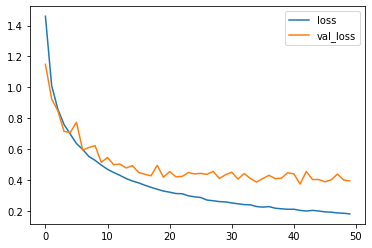

In [41]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

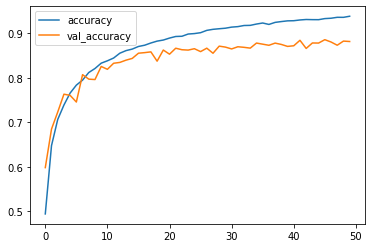

In [42]:
losses[['accuracy','val_accuracy']].plot()

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
y_pred=model2.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [46]:
model2.predict(X_test[11].reshape(1,32,32,3)).argmax(axis=1)

1/1 [==============================] - 0s 43ms/step


array([9])

In [47]:
import cv2

In [59]:
img=cv2.imread('/content/car.jpg')

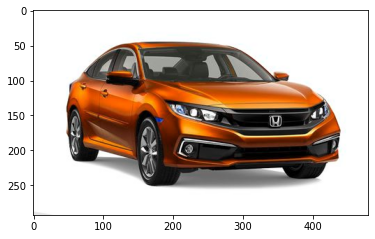

In [60]:
plt.imshow(img)

In [61]:
img=cv2.resize(img,(32,32))
test_input=img.reshape((1,32,32,3))

In [62]:
model.predict(test_input).argmax(axis=1)

1/1 [==============================] - 0s 27ms/step


array([1])

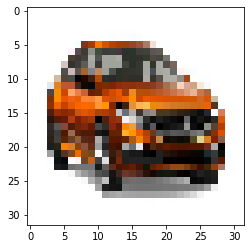

In [63]:
plt.imshow(img)